In [36]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [37]:
print

<function print>

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 
    'word_freq_data', 'word_freq_like', 'word_freq_time', 'word_freq_the', 
    'word_freq_dollar', 'word_freq_in', 'word_freq_it', 'word_freq_to', 'word_freq_and',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'
]

#เพิ่มข้อมูลเป้าหมาย
columns.append('spam')

#อ่านไฟล์
data = pd.read_csv('spambase.data', header=None, names=columns)


In [39]:
data

word_freq_make  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00            0.00   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65            0.21   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12            0.00   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31            0.00   
                                                           0.31            0.00   
...                                                                         ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00            0.00   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00            0.00   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30            0.00   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00            0.00   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65            0.00   

                                                                 word_freq_address  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00               0.00   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65               0.14   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12               1.75   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31               0.00   
                                                           0.31               0.00   
...                                                                            ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00               0.00   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00               0.00   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30               0.00   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00               0.00   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65               0.00   

                                                                 word_freq_all  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00           0.32   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65           0.14   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12           0.06   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31           0.31   
                                                           0.31           0.31   
...                                                                        ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00           0.00   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00           0.00   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30           0.00   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00           0.00   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65           0.00   

                                                                 word_freq_3d  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00          0.00   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65          0.07   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12          0.06   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31          0.00   
                                                           0.31          0.00   
...                                                                       ...   
0.31 0.00 0.62 0.0 0.00 0.31 0.00 0.00 0.00 0.00 0.00 1.88 0.00          0.00   
0.00 0.00 0.00 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00          0.00   
0.30 0.00 0.30 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.80 0.30          0.00   
0.96 0.00 0.00 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00          0.00   
0.00 0.00 0.65 0.0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.65          0.00   

                                                                 word_freq_ou

In [40]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_the,word_freq_dollar,word_freq_in,word_freq_it,word_freq_to,word_freq_and,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,10.000000,4.410000,20.000000,7.140000,9.090000,18.750000,18.180000,11.110000,17.100000,5.450000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [41]:
# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# ปรับขนาดข้อมูล
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# สร้างโมเดล
model = LogisticRegression()
model.fit(X_train, y_train)

# ทำนาย
y_pred = model.predict(X_test)

# ประเมินผล
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       531
           1       0.91      0.84      0.87       390

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



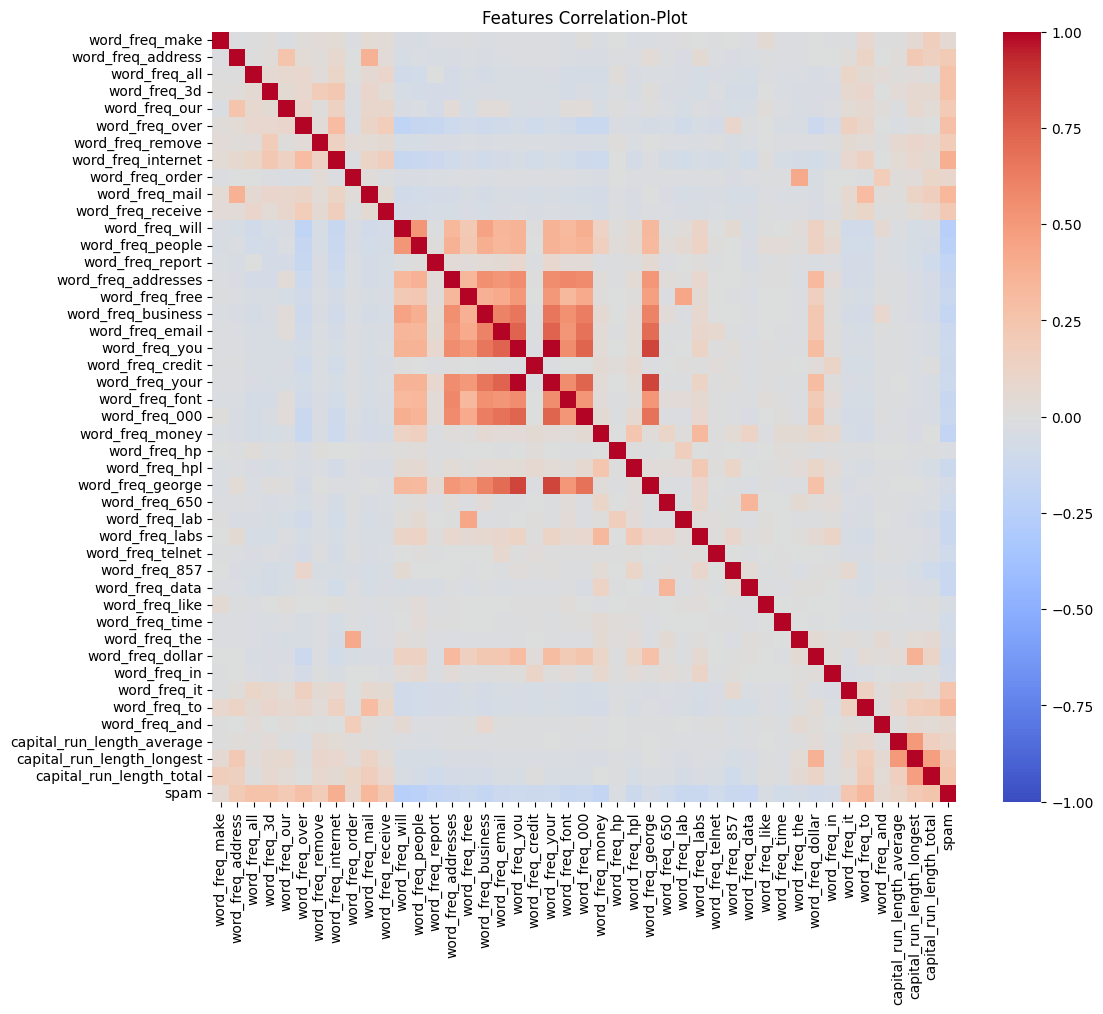

In [45]:
features = data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr() ,cmap='coolwarm', vmin=-1, vmax=1, center=0) #, 
plt.show()